In [108]:
from Hourbid import *
H_bids = HourBid()[2]

In [109]:
H_bids

,ID,OrderID,Hour,BitType,Quantity,price,Duration,LinkID
0,11,1,1,S,-183892.0,0.00,1,NaN
1,11,2,1,S,-184057.0,0.21,1,NaN
2,11,3,1,S,-184504.0,2.89,1,NaN
3,11,4,1,S,-184715.0,5.23,1,NaN
4,11,5,1,S,-184884.0,7.59,1,NaN
...,...,...,...,...,...,...,...,...
47995,242,996,24,S,185756.0,1991.94,1,NaN
47996,242,997,24,S,185750.0,1993.73,1,NaN
47997,242,998,24,S,185744.0,1995.43,1,NaN
47998,242,999,24,S,185735.0,1997.77,1,NaN


In [110]:
B = H_bids['BitType']
S = H_bids['Hour']
Q = H_bids['Quantity']
P = H_bids['price']
L = H_bids['Duration']

In [111]:
S[len(H_bids)-1]==24

True

In [112]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp


B = H_bids['BitType']
S = H_bids['Hour']
Q = H_bids['Quantity']
P = H_bids['price']
L = H_bids['Duration']
C_P = []
AX = []

for j in range(1,25):
    XD = []
    XS = []
    X = []
    for i in range(len(H_bids)) :
        if S[i] == j:
            X.append([P[i]])
            if Q[i] > 0 :
                XD.append([P[i],Q[i]])
            if Q[i] < 0 :
                XS.append([P[i],Q[i]])
    X.sort()
    XD.sort()
    XS.sort()
    #print(XD)
    #print(XS)
    X[0].append(XD[0][1]+ XS[0][1])
    X[1].append(XD[0][1]+ XS[0][1])
    for i in range(2,len(X)-2):
        kd = 0
        ks = 0
        while XD[kd][0]<=X[i][0] :
            kd+=1
        while XS[ks][0]<=X[i][0] :
            ks+=1
        X[i].append(float(np.interp(X[i], (XD[kd-1][0],XD[kd][0]) ,(XD[kd-1][1],XD[kd][1])) + np.interp(X[i], (XS[ks-1][0],XS[ks][0]) ,(XS[ks-1][1],XS[ks][1]))))
    X[len(X)-1].append((XD[len(XD)-1][1]) + (XS[len(XS)-1][1]))
    X[len(X)-2].append((XD[len(XD)-1][1]) + (XS[len(XS)-1][1]))
    AX.append(X)
    a = 0
    b = len(X)-1
    while b-a != 1 :
        c = int(a + ((b-a)/2) + (((b-a)/2)%1))
        if X[c][1] > 0 :
            a = c
        if X[c][1] < 0 :
            b = c
    C_P.append(np.interp(0, (X[b][1],X[a][1]),((X[b][0],X[a][0]))))
      #intial clearing prices  # intial clearing prices, this all works fine

In [113]:
C_P[0]

147.12226671087907

In [114]:
plt.plot(HS)

NameError: name 'HS' is not defined

In [ ]:
B[47999]

'S'

In [ ]:
AX[0]

[[0.0, 16108.0],
 [0.0, 16108.0],
 [0.21, 15797.399999999994],
 [1.95, 14300.783582089556],
 [2.23, 14160.082089552248],
 [2.89, 13882.477707006357],
 [5.23, 13077.535031847132],
 [5.37, 13031.974576271197],
 [6.15, 12818.118644067785],
 [7.59, 12454.98104265402],
 [8.26, 12293.280172413797],
 [9.91, 11940.0],
 [11.86, 11533.941176470602],
 [11.95, 11516.654867256642],
 [12.11, 11486.707964601781],
 [12.99, 11323.309523809527],
 [14.1, 11123.461309523816],
 [15.47, 10886.825112107617],
 [16.33, 10741.299999999988],
 [16.87, 10654.19565217392],
 [18.17, 10448.399999999994],
 [19.87, 10192.217391304352],
 [21.62, 9933.009615384624],
 [21.95, 9886.208000000013],
 [22.77, 9771.23999999999],
 [22.87, 9757.25],
 [24.29, 9564.517730496445],
 [25.69, 9377.63583815028],
 [26.8, 9233.497109826596],
 [27.75, 9113.382352941175],
 [28.78, 8984.470588235301],
 [29.52, 8892.678321678308],
 [30.21, 8809.023255813954],
 [30.81, 8736.82644628099],
 [33.69, 8399.793388429738],
 [33.84, 8382.647058823524]

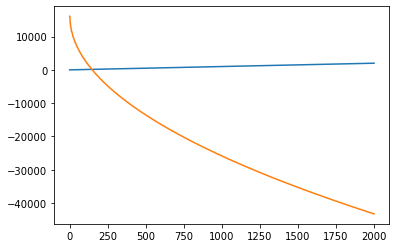

In [ ]:
plt.plot(AX[0])

In [ ]:

hourly_time = time.time()
print(hourly_time-start_time)

def move(A, x, B, y):
    B.insert(y,A[x])
    A.remove(A[x])

    return(A,B)

for i in range(0, len(BR)):
    C_P_avg = 0
    #print(BR[i][2]-1, BR[i][2]+BR[i][4])
    for j in range(BR[i-1][2]-1, BR[i-1][2]+BR[i-1][4]):
        C_P_avg += C_P[j-1][1]
   
    C_P_avg = C_P_avg/(BR[i-1][4])
    #print(C_P_avg)
    BR[i-1].append((BR[i-1][0]-C_P_avg)*abs(BR[i-1][3])*(BR[i-1][4]))         #B Format = [P, B, S, Q, L]

for i in range(0, len(BR)):
    IV = BR[i][5]
    BR[i].remove(BR[i][5])
    BR[i].insert(0,IV)  

BR.sort() # B Format = [IV, P, B, S, Q, L]
BR.reverse()
while BR[0][0] > 0 :
    if BR[0][1] > 0:
        for i in range(BR[0][3]-1, BR[0][3]+BR[0][5]):
            HBK[i-1] = HBK[i-1] + BR[0][1]
    else:
        for i in range(BR[0][3]-1, BR[0][3]+BR[0][5]):
            HBKN[i-1] = BR[0][1]
    
    BK.append(BR[0])
    BR.remove(BR[0])

    for i in range(0, len(BR)):
        C_P_avg = 0
        for j in range(BR[i-1][3]-1, BR[i-1][3]+BR[i-1][5]):
            C_P_avg += C_P[j-1][1]
   
        C_P_avg = C_P_avg/(BR[i-1][5])
        #print(C_P_avg)
        BR[i-1][0] = ((BR[i-1][1]-C_P_avg)*abs(BR[i-1][4]*(BR[i-1][5])))  
    
    BR.sort()
    BR.reverse()

    for j in range (BR[0][3]-1 , BR[0][3] + BR[0][5]-1):
        X = []
        XP = []
        XN = []
        XNP = []
        diff = []
        for i in range(0,48250) :
            if S[i] == j+1 and B[i] == 'S' :
                if Q[i] >= 0 :
                    X.append(Q[i] + HBK[j])
                    XP.append(P[i])
                else :
                    XN.append(abs(Q[i]) + abs(HBKN[j]))
                    XNP.append(P[i])

        x1 = list(reversed(X)) # I reverse the lists so interpolation is easier
        x2 = list(reversed(XN))
        y1 = list(reversed(XP))
        y2 = list(reversed(XNP))

        #plt.plot(X,XP) # plotting
        #plt.plot(XN,XNP)

        # interpolation

        for i in range(1,len(x1)):
            if x1[i] < x2[i]:
                x3 = x1[i]
                y2[i] = y2[i-1]+ (x3-x2[i-1])/(x2[i]-x2[i-1]) *(y2[i]-y2[i-1])
                x2[i] = x1[i]
            else:
                x4 = x2[i]
                y1[i] = y1[i-1]+ (x4-x1[i-1])/(x1[i]-x1[i-1]) *(y1[i]-y1[i-1])
                x1[i] = x2[i]
        

        
            diff.append(y1[i]-y2[i])
        
        #print(len(y1))
        #print(len(diff))
        k = min(diff)
        ans = 0
        for i in range(0,len(y1)):
            if y1[i]-y2[i]-k == 0:
                ans = i
        C_P[j] = [x1[ans], y1[ans]]
    print(time.time() - hourly_time)
    print(BR[0])
    print(C_P)

for i in range(0,len(BK)):
    for j in range(BK[i][3], BK[i][3]+BK[i][5]):
        C_P_avg += C_P[j-1][1]
   
    C_P_avg = C_P_avg/(BK[i][5])
    #print(C_P_avg)
    BK[i][0] = ((BK[i-1][1]-C_P_avg)*abs(BK[i-1][4]*(BK[i-1][5])))

    if BK[i][0] < 0 :
        BAN.append(BK[i])
        BR.append(BK[i])

for i in range(0,len(BAN)):
    BK.remove(BAN[i])

HBK = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
HBKN = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(0,len(BK)):
    for j in range(BK[i][3]-1, BK[i][3] + BK[i][5]-1):
        if BK[i][4] > 0 :
            HBK[j] = HBK[j] + BK[i][4]
        else :
            HBKN[j] = HBKN[j] + abs(BK[i][4]) 

for j in range(0, 24):
    X = []
    XP = []
    XN = []
    XNP = []
    diff = []
    for i in range(0,48250) :
        if S[i] == j+1 and B[i] == 'S' :
            if Q[i] >= 0 :
                X.append(Q[i] + HBK[j])
                XP.append(P[i])
            else :
                XN.append(abs(Q[i]) + abs(HBKN[j]))
                XNP.append(P[i])
    x1 = list(reversed(X)) # I reverse the lists so interpolation is easier
    x2 = list(reversed(XN))
    y1 = list(reversed(XP))
    y2 = list(reversed(XNP))
    #plt.plot(X,XP) # plotting
    #plt.plot(XN,XNP)

    # interpolation

    for i in range(1 , len(x1)):
        if x1[i] < x2[i]:
            x3 = x1[i]
            y2[i] = y2[i-1]+ (x3-x2[i-1])/(x2[i]-x2[i-1]) *(y2[i]-y2[i-1])
            x2[i] = x1[i]
        else:
            x4 = x2[i]
            y1[i] = y1[i-1]+ (x4-x1[i-1])/(x1[i]-x1[i-1]) *(y1[i]-y1[i-1])
            x1[i] = x2[i]
        

        
        diff.append(y1[i]-y2[i])
    
    #print((diff))    
    
    #print(len(y1))
    k = min(diff)
    ans = 0
    for i in range(0,len(y1)):
        if y1[i]-y2[i]-k == 0:
            ans = i
    C_P[j] = [x1[ans], y1[ans]]

print(C_P)

BAN = []
for i in range(0,len(BK)):
    for j in range(BK[i][3], BK[i][3]+BK[i][5]):
        C_P_avg += C_P[j-1][1]
   
    C_P_avg = C_P_avg/(BK[i][5])
    #print(C_P_avg)
    BK[i][0] = ((BK[i-1][1]-C_P_avg)*abs(BK[i-1][4]*(BK[i-1][5])))

    if BK[i][0] < 0 :
        BAN.append(BK[i])
        BPA.append(BK[i])

for i in range(0,len(BAN)):
    BK.remove(BAN[i])

block_time = time.time()
print(block_time-hourly_time)

315.3918709754944


NameError: name 'BR' is not defined

In [ ]:
for i in range(0,len(BK)):
    for j in range(BK[i][3], BK[i][3]+BK[i][5]):
        C_P_avg += C_P[j-1][1]
   
    C_P_avg = C_P_avg/(BK[i][5])
    #print(C_P_avg)
    BK[i][0] = ((BK[i-1][1]-C_P_avg)*abs(BK[i-1][4]*(BK[i-1][5])))

    if BK[i][0] < 0 :
        BAN.append(BK[i])
        BR.append(BK[i])

for i in range(0,len(BAN)):
    if BAN[i] in BK == True :
        BK.remove(BAN[i])

HBK = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
HBKN = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(0, len(BK)):
    for j in range(BK[i][3]-1, BK[i][3] + BK[i][5]-1):
        if BK[i][4] > 0:
            HBK[j] = HBK[j] + BK[i][4]
        if BK[i][4] < 0:
            HBKN[j] = HBKN[j] + abs(BK[i][4])

for j in range(1, 24):
    X = []
    XP = []
    XN = []
    XNP = []
    diff = []
    for i in range(0,48250) :
        if S[i] == j+1 and B[i] == 'S' :
            if Q[i] >= 0 :
                X.append(Q[i] + HBK[j])
                XP.append(P[i])
            else :
                XN.append(abs(Q[i]) + abs(HBKN[j]))
                XNP.append(P[i])
    x1 = list(reversed(X)) # I reverse the lists so interpolation is easier
    x2 = list(reversed(XN))
    y1 = list(reversed(XP))
    y2 = list(reversed(XNP))
    #plt.plot(X,XP) # plotting
    #plt.plot(XN,XNP)

    # interpolation

    for i in range(1,len(x1)):
        if x1[i] < x2[i]:
            x3 = x1[i]
            y2[i] = y2[i-1]+ (x3-x2[i-1])/(x2[i]-x2[i-1]) *(y2[i]-y2[i-1])
            x2[i] = x1[i]
        else:
            x4 = x2[i]
            y1[i] = y1[i-1]+ (x4-x1[i-1])/(x1[i]-x1[i-1]) *(y1[i]-y1[i-1])
            x1[i] = x2[i]
        

        
        diff.append(y1[i]-y2[i])
    
    #print((diff))    
    
    #print(len(y1))
    k = min(diff)
    ans = 0
    for i in range(0,len(y1)):
        if y1[i]-y2[i]-k == 0:
            ans = i
    C_P[j] = [x1[ans], y1[ans]]

print(C_P)


[[128607.0, 628.2533333333333], [160549.0, 575.7963736263736], [149230.0, 630.0678125], [149721.0, 957.2142307692308], [133141.0, 416.9133870967742], [144417.0, 967.0079310344827], [119442.0, 540.1201960784314], [157139.0, 725.41], [120540.0, 678.5078974358975], [135840.0, 256.90350993377484], [152377.0, 859.6375], [121734.0, 707.5401081081081], [149703.0, 987.135681818182], [118767.0, 362.11275862068965], [119775.0, 575.9637623762376], [145650.0, 875.1750793650796], [156575.0, 131.82179916317992], [153369.0, 628.9932967032967], [148250.0, 355.8090243902439], [158228.0, 706.5694791666667], [125080.0, 309.68367647058824], [159173.0, 1012.0111475409836], [119345.0, 364.7443939393939], [133871.0, 237.3825078369906]]


In [ ]:
FR = []
FK = []
for i in range (0,48250):
    if B[i] == 'F':
        FR.append([P[i],Q[i]])
#print(FR)
C_Pmin = 4000
C_Pmax = 0
for j in range(1,25):
    if C_P[j-1][1] < C_Pmin:
        C_Pmin = C_P[j-1][1]
        Smin = j
    if C_P[j-1][1] > C_Pmax:
        C_Pmax = C_P[j-1][1]
        Smax = j

#print(Smin, Smax)
#print(C_Pmin, C_Pmax)
for i in range(0,len(FR)):
    if FR[i][1] > 0 and FR[i][0] > C_Pmin:
        BK.append([0, FR[i][0], 'F', Smax, FR[i][1], 1])
    if FR[i][1] > 0 and FR[i][0] > C_Pmin:
        BK.append([0, FR[i][0], 'F', Smin, FR[i][1], 1])

#print(BK)

for i in range(0,len(BK)):
    for j in range(BK[i][3], BK[i][3]+BK[i][5]):
        C_P_avg += C_P[j-1][1]
   
    C_P_avg = C_P_avg/(BK[i][5])
    #print(C_P_avg)
    BK[i][0] = ((BK[i-1][1]-C_P_avg)*abs(BK[i-1][4]*(BK[i-1][5])))

    if BK[i][0] < 0 :
        BAN.append(BK[i])
        BR.append(BK[i])

for i in range(0,len(BAN)):
    if BAN[i] in BK == True :
        BK.remove(BAN[i])

HBK = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
HBKN = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(0, len(BK)):
    for j in range(BK[i][3]-1, BK[i][3] + BK[i][5]-1):
        if BK[i][4] > 0:
            HBK[j] = HBK[j] + BK[i][4]
        if BK[i][4] < 0:
            HBKN[j] = HBKN[j] + abs(BK[i][4])

for j in range(1, 24):
    X = []
    XP = []
    XN = []
    XNP = []
    diff = []
    for i in range(0,48250) :
        if S[i] == j+1 and B[i] == 'S' :
            if Q[i] >= 0 :
                X.append(Q[i] + HBK[j])
                XP.append(P[i])
            else :
                XN.append(abs(Q[i]) + abs(HBKN[j]))
                XNP.append(P[i])
    x1 = list(reversed(X)) # I reverse the lists so interpolation is easier
    x2 = list(reversed(XN))
    y1 = list(reversed(XP))
    y2 = list(reversed(XNP))
    #plt.plot(X,XP) # plotting
    #plt.plot(XN,XNP)

    # interpolation

    for i in range(1,len(x1)):
        if x1[i] < x2[i]:
            x3 = x1[i]
            y2[i] = y2[i-1]+ (x3-x2[i-1])/(x2[i]-x2[i-1]) *(y2[i]-y2[i-1])
            x2[i] = x1[i]
        else:
            x4 = x2[i]
            y1[i] = y1[i-1]+ (x4-x1[i-1])/(x1[i]-x1[i-1]) *(y1[i]-y1[i-1])
            x1[i] = x2[i]
        

        
        diff.append(y1[i]-y2[i])
    
    #print((diff))    
    
    #print(len(y1))
    k = min(diff)
    ans = 0
    for i in range(0,len(y1)):
        if y1[i]-y2[i]-k == 0:
            ans = i
    C_P[j] = [x1[ans], y1[ans]]

print(C_P)



[[128607.0, 628.2533333333333], [160549.0, 575.7963736263736], [149230.0, 630.0678125], [149721.0, 957.2142307692308], [133141.0, 416.9133870967742], [144417.0, 967.0079310344827], [119442.0, 540.1201960784314], [157139.0, 725.41], [120540.0, 678.5078974358975], [135840.0, 256.90350993377484], [152377.0, 859.6375], [121734.0, 707.5401081081081], [149703.0, 987.135681818182], [118767.0, 362.11275862068965], [119775.0, 575.9637623762376], [145650.0, 875.1750793650796], [159158.0, 176.45501730103805], [153369.0, 628.9932967032967], [148250.0, 355.8090243902439], [158228.0, 706.5694791666667], [125080.0, 309.68367647058824], [166250.0, 1140.5734482758621], [119345.0, 364.7443939393939], [133871.0, 237.3825078369906]]


In [ ]:
import shapely
from shapely.geometry import LineString, Point
for j in range(1,2):
    XD = []
    XS = []
    X = []
    for i in range(0,48250) :
        if S[i] == j and B[i] == 'S' and  Q[i] >= 0:
            XD.append([Q[i],P[i]])
        if S[i] == j and B[i] == 'S' and  Q[i] < 0: 
            XS.append([abs(Q[i]),P[i]])
    XD.sort()
    XS.sort()
    XDN = []
    XSN = []
    for i in range(0,len(XS)):
        for j in range(0,len(XD)-2):
            if XD[j][0] < XS[i][0] < XD[j+1][0] :
                XDN.append([XS[i][0], np.interp(XS[i][0], (XD[j][0],XD[j][1]) , (XD[j+1][0],XD[j+1][1]))])
                print(XS[i][0], np.interp(XS[i][0], (XD[j][0],XD[j][1]) , (XD[j+1][0],XD[j+1][1])))
        XSN.append(XS[i])
           
    for i in range(0, len(XD)):
        for j in range(0 , len(XS)-2):
            if XS[j][0] < XD[i][0] < XS[j+1][0] :
                XSN.append([XD[i][0], np.interp(XD[i][0], (XS[j][0],XS[j][1]) , (XS[j+1][0],XS[j+1][1]))])
                print([XD[i][0], np.interp(XD[i][0], (XS[j][0],XS[j][1]) , (XS[j+1][0],XS[j+1][1]))])
        XDN.append(XD[i])

    XDN.sort()
    XSN.sort()
    #print(XDN)
    #print(XSN)
    for i in range(0,len(XD)):
        X.append([XD[i][0], XD[i][1]-XS[i][1]])
    X.sort()


''' i = int(len(X)/2 + len(X)%1)
    lb = 0
    ub = len(X)
    loop = 'on'
    while loop == 'on': 
        if X[i][1] and X[i+1][1]> 0 :
            ub = i
            i = int(i/2 + (i/2)%1)
        if X[i][1] and X[i+1][1]< 0 :
            lb = i
            i = int((ub-i)/2 + ((ub-i)/2)%1)
        if X[i][1] < 0 and X[i+1][1] > 0 :
            loop = 'off'

    print(i,i+1)
    print(X[i],X[i+1])'''



72770.0 1995.12
73059.0 1985.55
73512.0 1970.47
73696.0 1964.18
74028.0 1954.89
74427.0 1942.58
74926.0 1927.43
75226.0 1918.88
75628.0 1905.38
75851.0 1898.08
76271.0 1886.2
76572.0 1876.99
76955.0 1866.01
77137.0 1859.26
77445.0 1848.49
77644.0 1843.16
78245.0 1824.2
78407.0 1821.99
78821.0 1808.75
78883.0 1806.82
79326.0 1794.76
79634.0 1785.58
80028.0 1772.69
80228.0 1767.78
80500.0 1759.66
80978.0 1745.04
81033.0 1742.5
81493.0 1729.74
81755.0 1722.81
82015.0 1714.94
82185.0 1710.54
82693.0 1695.8
82796.0 1692.14
83293.0 1678.41
83418.0 1674.12
83790.0 1661.97
83921.0 1660.62
84218.0 1651.84
84605.0 1639.18
84948.0 1630.21
85161.0 1625.53
85370.0 1618.71
85743.0 1605.63
85884.0 1604.35
86166.0 1596.62
86366.0 1589.75
86869.0 1576.74
87082.0 1570.1
87232.0 1565.68
87595.0 1556.01
87787.0 1550.09
87920.0 1547.12
88192.0 1537.86
88466.0 1532.09
88794.0 1522.39
89169.0 1512.47
89312.0 1509.94
89586.0 1502.65
89883.0 1493.88
90236.0 1484.13
90525.0 1475.72
90906.0 1463.84
91008.0 1463.

" i = int(len(X)/2 + len(X)%1)\n    lb = 0\n    ub = len(X)\n    loop = 'on'\n    while loop == 'on': \n        if X[i][1] and X[i+1][1]> 0 :\n            ub = i\n            i = int(i/2 + (i/2)%1)\n        if X[i][1] and X[i+1][1]< 0 :\n            lb = i\n            i = int((ub-i)/2 + ((ub-i)/2)%1)\n        if X[i][1] < 0 and X[i+1][1] > 0 :\n            loop = 'off'\n\n    print(i,i+1)\n    print(X[i],X[i+1])"